In [2]:
import numpy as np
import pandas as pd
import math
import copy
from random import seed
from random import random
import matplotlib.pyplot as plt  # import matplotlib for plotting and visualization
import matplotlib
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow.keras import layers
from struct import unpack
import os
import shutil

In [3]:
## images path
orig_path = pathlib.Path(r'C:\Users\istra\img\images\images')
destin_path= pathlib.Path(r'C:\Users\istra\Google Drive\Cours HEC\Maitrise\Semestre 2\Machine_Learning\TP GROUPE\book_covers')
image_count=len(list(orig_path.glob('*.jpg')))
print(image_count)

53618


Opening the csv file

In [4]:
goodread = pd.read_csv(r'C:\Users\istra\img\book_data.csv')

Getting the number of tags per genre


In [5]:
all_genres = [ str(genres).split("|") for genres in goodread["genres"]]

In [6]:
all_genres_long =pd.DataFrame([genre for book in all_genres for genre in book])

In [7]:
all_genres_long.columns = ("genre",)

Plotting the main genres we see in all tags

<AxesSubplot:xlabel='genre'>

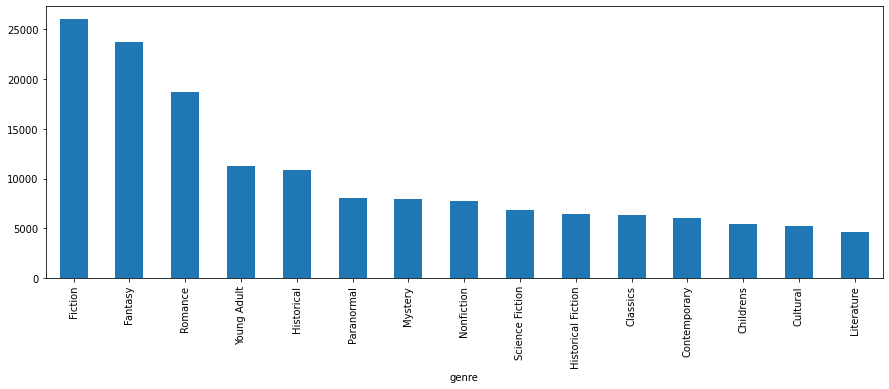

In [8]:
all_genres_long.value_counts("genre")[all_genres_long.value_counts("genre")>4000 ].plot.bar(figsize=(15,5))

Doing the same analysis for the first, second and thrid tag

In [9]:
genre_tags = pd.DataFrame(all_genres).iloc[:,0:3]
genre_tags.columns = ("first","second","third")

<AxesSubplot:xlabel='third'>

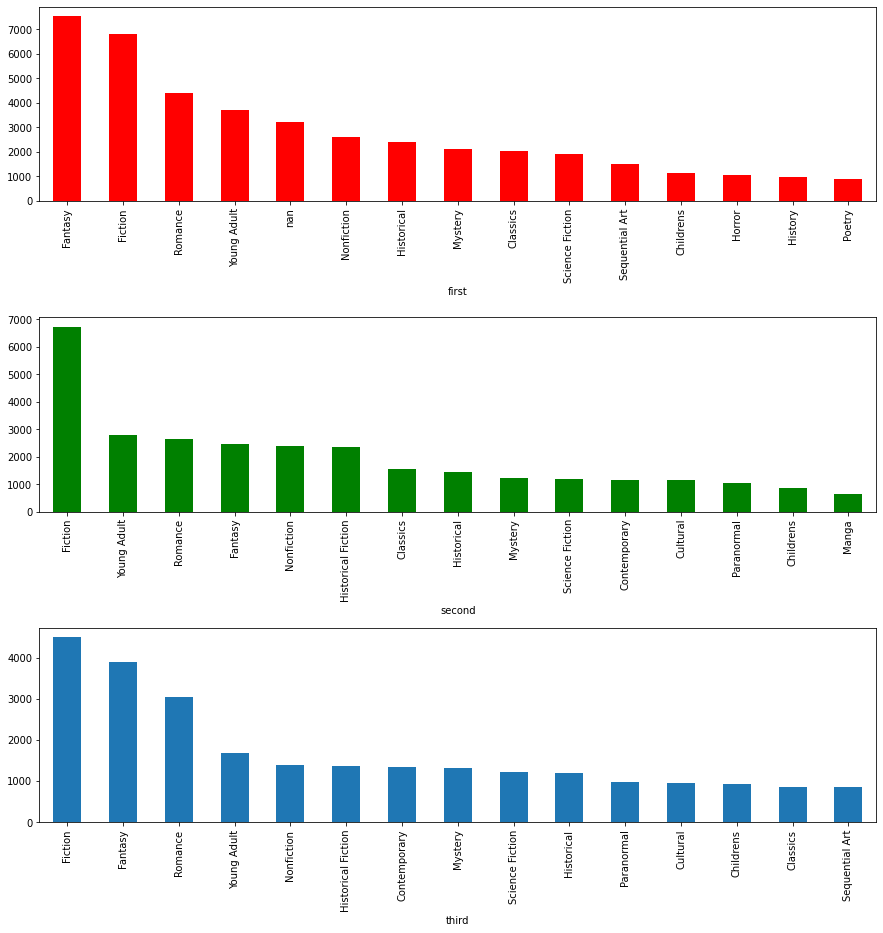

In [10]:
fig,axes  = plt.subplots(nrows = 3 , ncols =1, figsize=(15,15))
fig.subplots_adjust(hspace=0.6)
genre_tags.value_counts("first")[:15].plot.bar(ax=axes[0],color="red")
genre_tags.value_counts("second")[:15].plot.bar(ax=axes[1],color="green")
genre_tags.value_counts("third")[:15].plot.bar(ax=axes[2])

Because there is a lot of overlapping between genres, mont books having multiple tags, we will take on the first tag that is not in  the following categories : 
- Fiction
- Nonfiction
- nan 

In [11]:
genres = pd.DataFrame([next((genre for genre in book if genre not in ["Fiction","nan","Nonfiction"] ),None) for book in all_genres],columns =("genre",))

Variant with 3 genres

In [12]:
a = [(genre for genre in book if genre not in ["Fiction","nan","Nonfiction",None])for book in all_genres]
with3cat=[]
for book in a:
    with3cat.append([next(book,None),next(book,None),next(book,None)])
w3cdf = pd.DataFrame(with3cat,columns=("First","Second","Third"))    

In [13]:
final_genres = goodread.drop(goodread.loc[:,"book_desc":"book_review_count"].columns, axis=1).drop("image_url",axis=1)

In [14]:
final_genres["main_genre"] = genres
final_genres["second_genre"] = w3cdf["Second"]
final_genres["third_genre"] = w3cdf["Third"]
final_genres["img"] = final_genres.index.astype('str')+".jpg"

In [15]:
tags = pd.DataFrame(genres.value_counts("genre"), columns =("count",))

In [14]:
tags[tags["count"]>1000]

,count
genre,
Fantasy,7766
Romance,4616
Young Adult,3866
Historical,3303
Classics,2887
Mystery,2531
Science Fiction,2108
Sequential Art,1528
Cultural,1316


<AxesSubplot:xlabel='genre'>

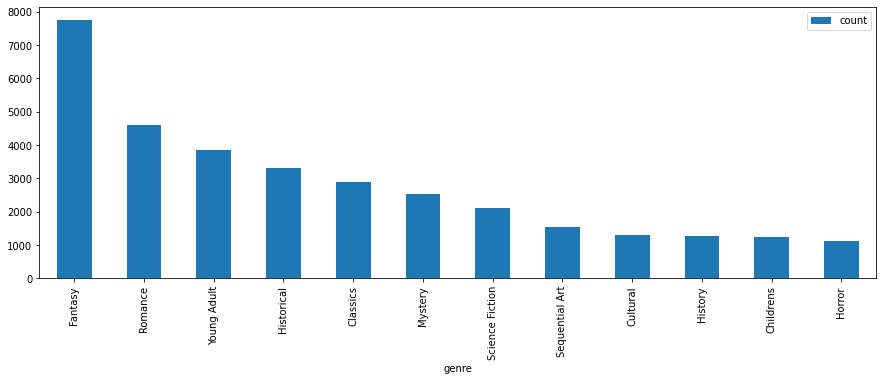

In [16]:
tags[tags["count"]>1000].plot.bar(figsize=(15,5))

In [17]:
selected_categories = list(tags[tags["count"]>1000].index)

Taking now the first 13 categories

In [18]:
selected_categories = list(tags[:13].index)

In [19]:
selected_categories

['Fantasy',
 'Romance',
 'Young Adult',
 'Historical',
 'Classics',
 'Mystery',
 'Science Fiction',
 'Sequential Art',
 'Cultural',
 'History',
 'Childrens',
 'Horror',
 'Poetry']

In [20]:
def return_label(mg):
    if mg in selected_categories:
        val = mg
    #elif mg == None:
    #    val = None
    else:
        val = "Other"
    return val

In [21]:
#final_genres_filtered = final_genres[final_genres.main_genre.isin(selected_categories)]
final_genres_filtered = final_genres
final_genres_filtered["main_label"]=final_genres_filtered["main_genre"].map(return_label)
final_genres_filtered["second_label"]=final_genres_filtered["second_genre"].map(return_label)
final_genres_filtered["third_label"]=final_genres_filtered["third_genre"].map(return_label)


Checking images

In [22]:
def check_image(fn):
    try:
        fobj = open(fn, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        if not is_jfif: raise NameError('corrupt file')
        file_contents = tf.io.read_file(fn)
        image = tf.image.decode_jpeg(file_contents, channels=3)
    except:
        print("check error",fn)
        raise NameError('corrupt file')

In [ ]:
num_skipped = 0
num_copied = 0 
file_exists = 0
for index,book in final_genres_filtered.iterrows():
    genre = book["main_label"]
    fpath = str(orig_path) +"\\"+book["img"]
    target= str(destin_path)+"\\"+genre+"\\"+book["img"]
    if not os.path.exists(str(destin_path)+"\\"+genre): 
        os.mkdir(str(destin_path)+"\\"+genre)
    try:
        if os.path.isfile(target):
            file_exists+=1
        else:
            check_image(fpath)
    except:
        print("error, the following image was not copied",fpath)
        num_skipped+=1
    else:
        try:
            if not os.path.isfile(target):
                shutil.copy(fpath,target)
                num_copied +=1

        except IOError as e:
            print("Unable to copy file. %s" % e)
        except:
            print("Unexpected error:", sys.exc_info())
print("We skipped %d corrupt images" % num_skipped)
print("There were already %d files there" %file_exists)
print("We copied %d files" %num_copied)

In [101]:
%store final_genres_filtered

Stored 'final_genres_filtered' (DataFrame)


<AxesSubplot:xlabel='main_label'>

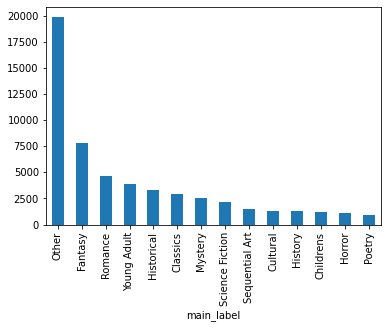

In [23]:
final_genres_filtered.value_counts("main_label").plot.bar()

<AxesSubplot:xlabel='second_label'>

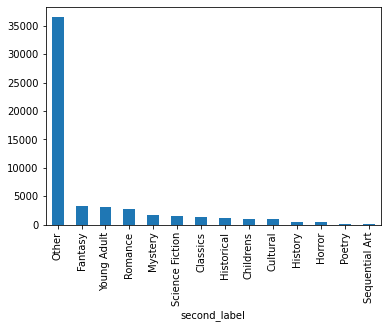

In [24]:
final_genres_filtered.value_counts("second_label").plot.bar()

<AxesSubplot:xlabel='third_label'>

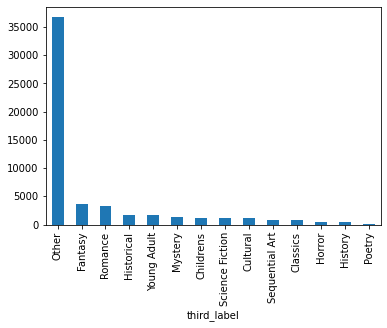

In [25]:
final_genres_filtered.value_counts("third_label").plot.bar()